In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Fandango Displayed Scores versus True User Ratings***

In [7]:
fandango = pd.read_csv("D:/UDEMY/Python for Data Science/DataAnalysisandVisualizationProject/fandango_scrape.csv")

In [8]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [9]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


**scatterplot**

<Axes: xlabel='RATING', ylabel='VOTES'>

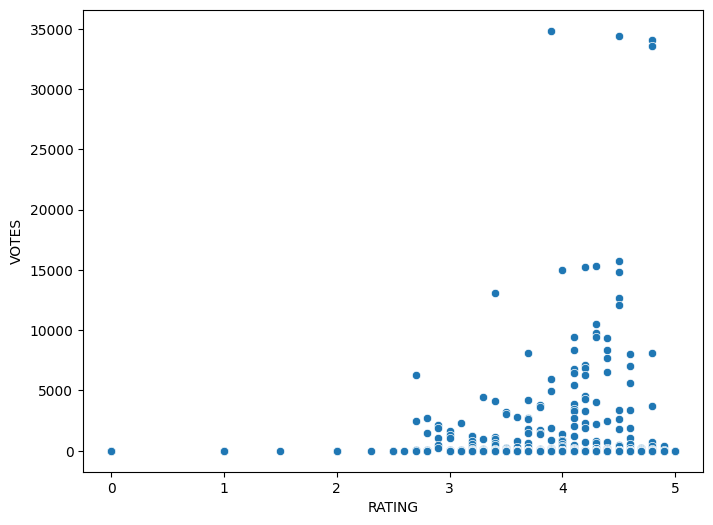

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

**correlation**

In [11]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


*creating different column for year*

In [12]:
import re

def func(val):
    length = len(val)-1
    val = val.split(' ',maxsplit=length)
    val = re.sub('[^0-9]+','',val[-1])

    return val    

In [13]:
fandango['YEAR'] = fandango['FILM'].apply(func)

In [14]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


*Movies per year*

In [15]:
movies_peryear = fandango.groupby('YEAR').count()['FILM'].sort_values(ascending=False)

In [16]:
movies_peryear

YEAR
2015    478
2014     23
1964      1
2012      1
2016      1
Name: FILM, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

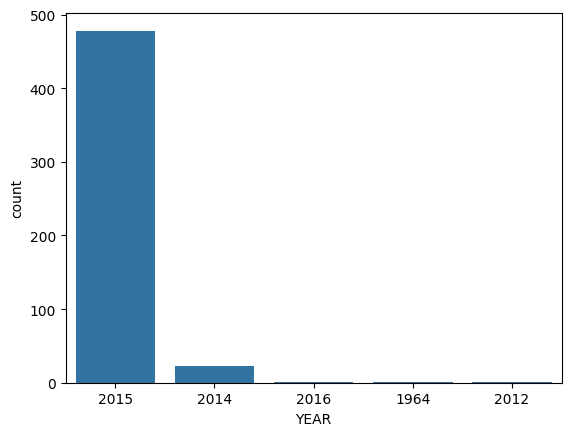

In [17]:
sns.countplot(data=fandango,x=fandango['YEAR'])

*Seperating movies with zero votes*

In [18]:
fandango.sort_values(by='VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [19]:
fandango[fandango['VOTES'] == 0]['FILM'].count()

69

In [20]:
fandango_fd = fandango[fandango['VOTES'] != 0]

In [21]:
fandango_fd

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


*KDE plot to see the difference between the true ratings (from votes) and stars displayed by fandango*

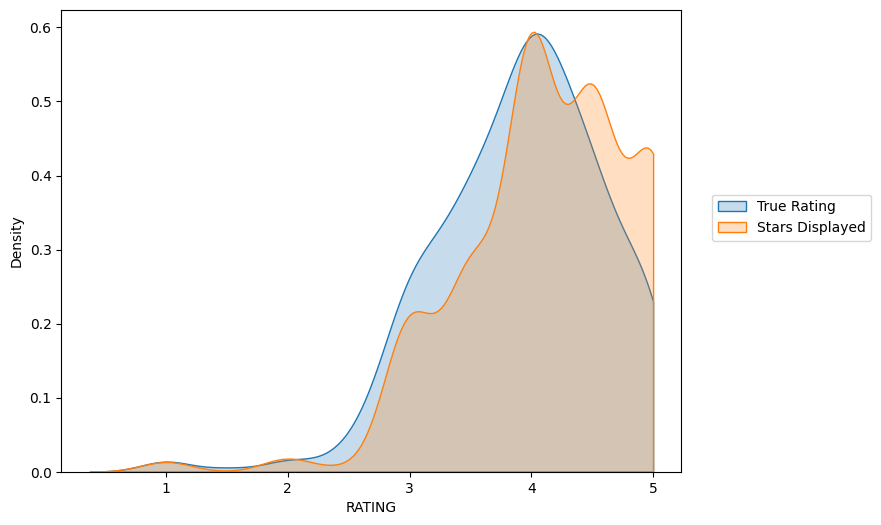

In [22]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=fandango_fd,x='RATING',fill=True,clip=(0,5))
sns.kdeplot(data=fandango_fd,x='STARS',fill=True,clip=(0,5))
plt.legend(loc=[1.05,0.5],labels=['True Rating','Stars Displayed'])

In [23]:
fandango_fd['Difference'] = abs(fandango_fd['STARS'] - fandango_fd['RATING']).round(1)

C:\Users\SHIVAM GHUGE\AppData\Local\Temp\ipykernel_4648\4093941000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_fd['Difference'] = abs(fandango_fd['STARS'] - fandango_fd['RATING']).round(1)


In [24]:
fandango_fd['Difference']

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: Difference, Length: 435, dtype: float64

C:\Users\SHIVAM GHUGE\AppData\Local\Temp\ipykernel_4648\2080616026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fandango_fd,x='Difference',palette='rocket')


<Axes: xlabel='Difference', ylabel='count'>

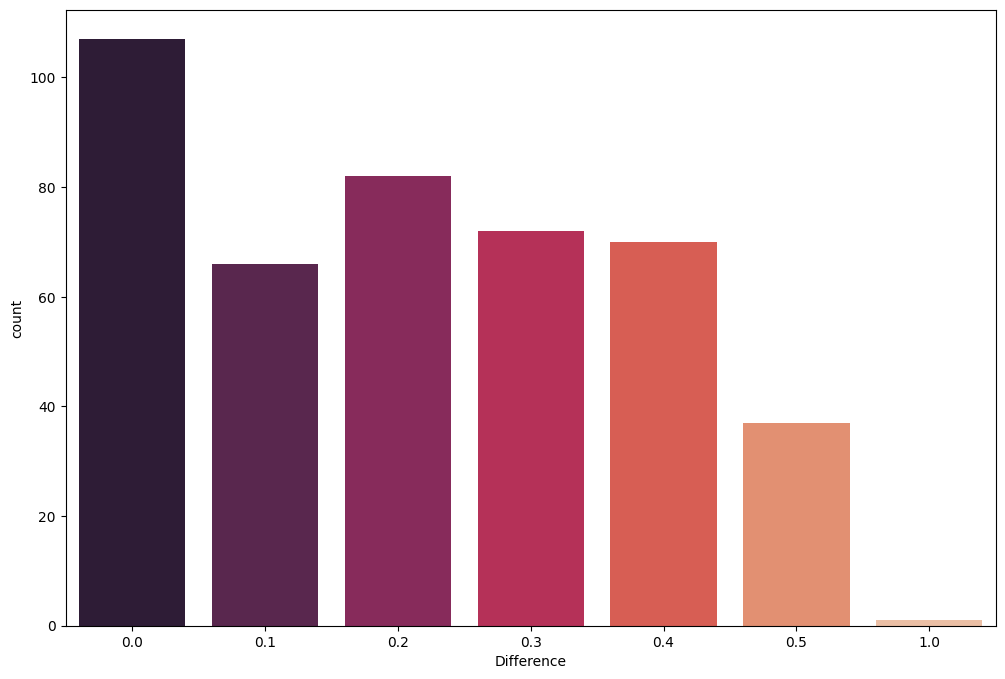

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=fandango_fd,x='Difference',palette='rocket')

*movie with 1 star difference*

In [26]:
fandango_fd[fandango_fd['Difference'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,Difference
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# ***Comparing Ratings of Other Sites***

In [56]:
all_sites = pd.read_csv("D:/UDEMY/Python for Data Science/DataAnalysisandVisualizationProject/all_sites_scores.csv")

In [28]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [30]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


***Rotten Tomatoes***

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

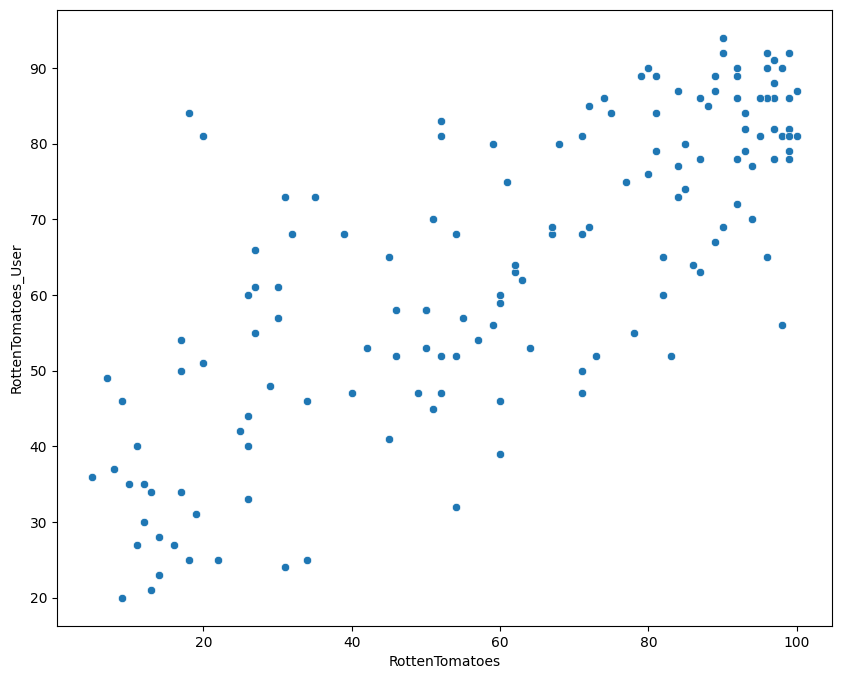

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [32]:
all_sites['critics vs users'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [33]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics vs users
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


*creating distribution of critics vs users*

<Axes: xlabel='critics vs users', ylabel='Count'>

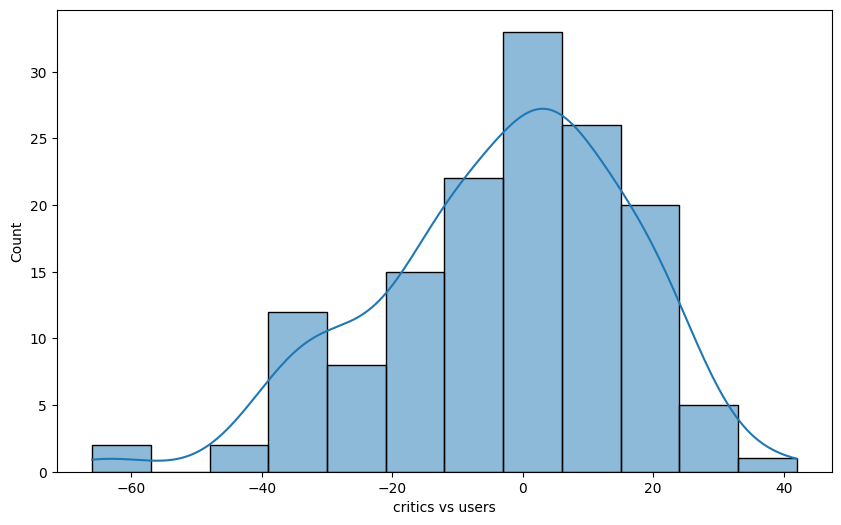

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=all_sites,x='critics vs users',kde=True)

*distribution of *absolute value* of critics vs users*

<Axes: xlabel='critics vs users', ylabel='Count'>

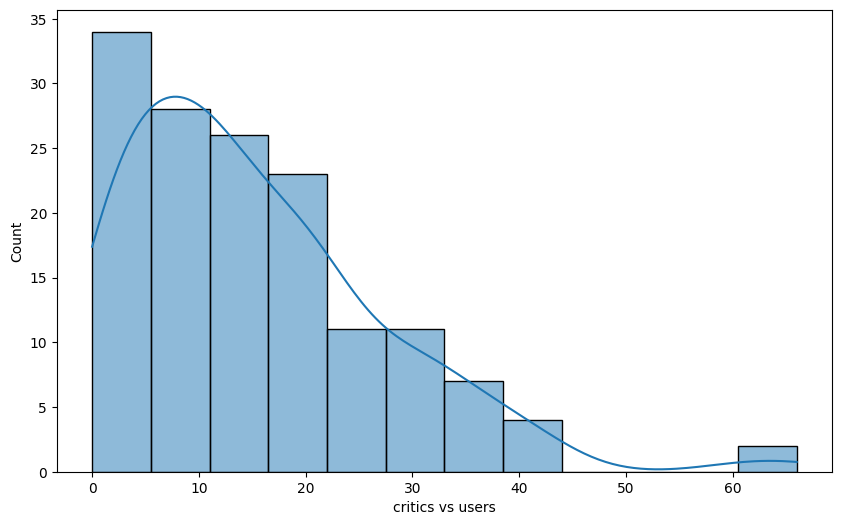

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=all_sites['critics vs users'].abs(),kde=True)

***movies with largest difference***

*user rated > critics*

In [36]:
all_sites[all_sites['critics vs users'] < 0][['FILM','critics vs users']].sort_values(by='critics vs users').iloc[:5]

,FILM,critics vs users
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


*critics > users rating*

In [37]:
all_sites[all_sites['critics vs users'] > 0][['FILM','critics vs users']].sort_values(by='critics vs users',ascending=False).iloc[:5]

,FILM,critics vs users
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
40,I'll See You In My Dreams (2015),24


***Metacritic***

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

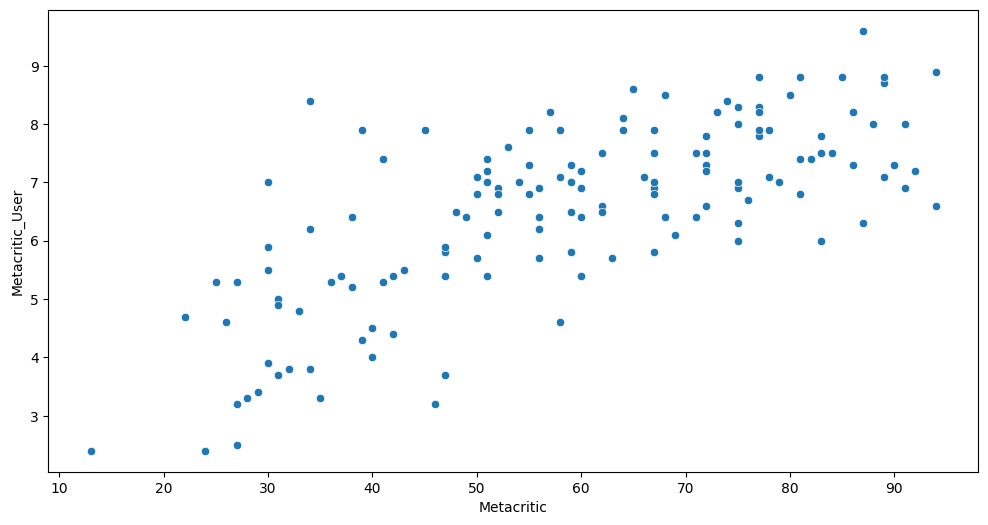

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

*Votes counts on metacritic vs vote counts on IMDB*

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

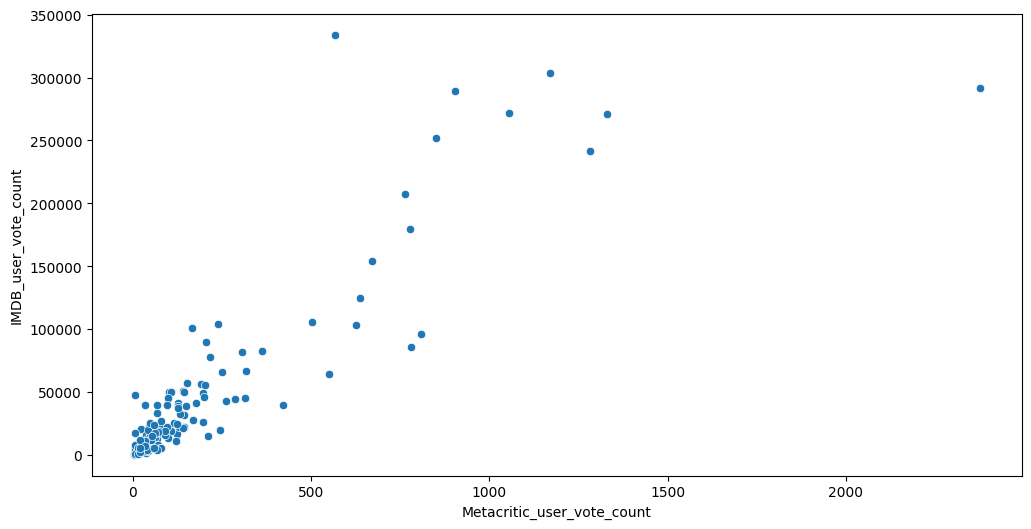

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

*Highest metacritic voted movie*

In [40]:
idx = all_sites['Metacritic_user_vote_count'].argmax()

all_sites.loc[[idx]]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics vs users
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# ***Fandago  vs. All Sites***

***Combine the Fandango Table with the All Sites table***

In [41]:
data = fandango_fd.merge(all_sites,how='inner')

# inner merge because we only want those movies which are common in both

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   Difference                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  critics vs users            145 non

In [43]:
data.describe()

,STARS,RATING,VOTES,Difference,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics vs users
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,0.244828,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,0.152721,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,0.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,0.100000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,0.200000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,0.400000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,0.500000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


*The RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.*

In [44]:
data['IMDB'] = np.round(data['IMDB']/2,1)
data['Metacritic_User'] = np.round(data['Metacritic_User']/2,1)

In [45]:
data['RottenTomatoes'] = np.round(data['RottenTomatoes']/20,1)
data['RottenTomatoes_User'] = np.round(data['RottenTomatoes_User']/20,1)
data['Metacritic'] = np.round(data['Metacritic']/20,1)

In [46]:
data.head()

,FILM,STARS,RATING,VOTES,YEAR,Difference,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics vs users
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.2,2.1,2.3,1.6,2.1,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.6,4.0,3.0,3.5,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.6,4.2,3.6,3.3,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.0,4.2,3.4,3.4,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.9,4.5,4.7,4.4,4.3,807,96252,8


*creating a norm_scores DataFrame that only contains the normalized ratings*

In [47]:
data.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'Difference',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'critics vs users'],
      dtype='object')

In [48]:
norm_data = data[['FILM','STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']]

In [49]:
norm_data

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


***Comparing Distribution of Scores Across Sites***

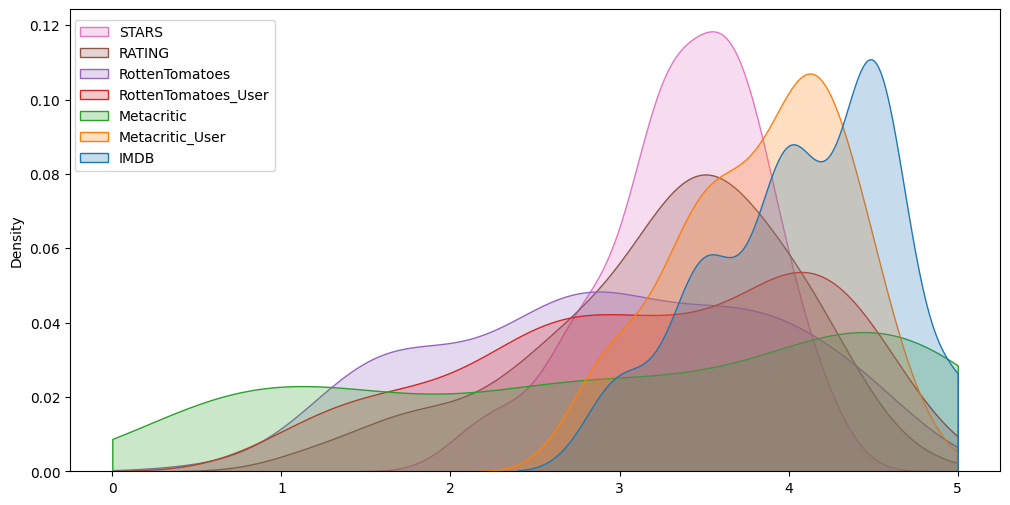

In [50]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=norm_data,fill=True,clip=(0,5))
plt.legend(loc=[0.005,0.65],labels=['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User','Metacritic', 'Metacritic_User', 'IMDB'])


# Clearly Fandango has an uneven distribution.

*Rottentomatoes vs fandango*

<Axes: ylabel='Density'>

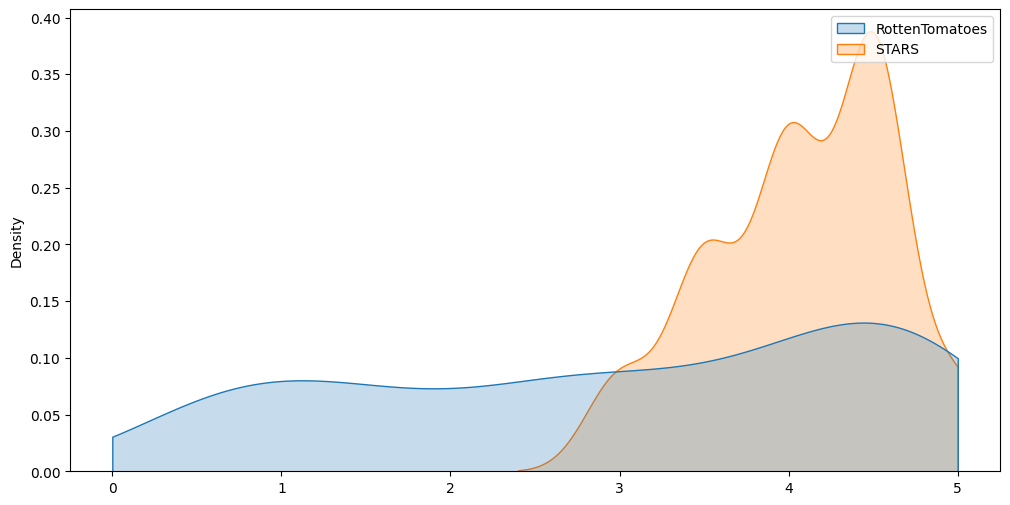

In [51]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=norm_data[['RottenTomatoes','STARS']],fill=True,clip=(0,5))

***Cluster map of ratings*** 

*We can observe that high rated movies are clustered together and low rated movies together*

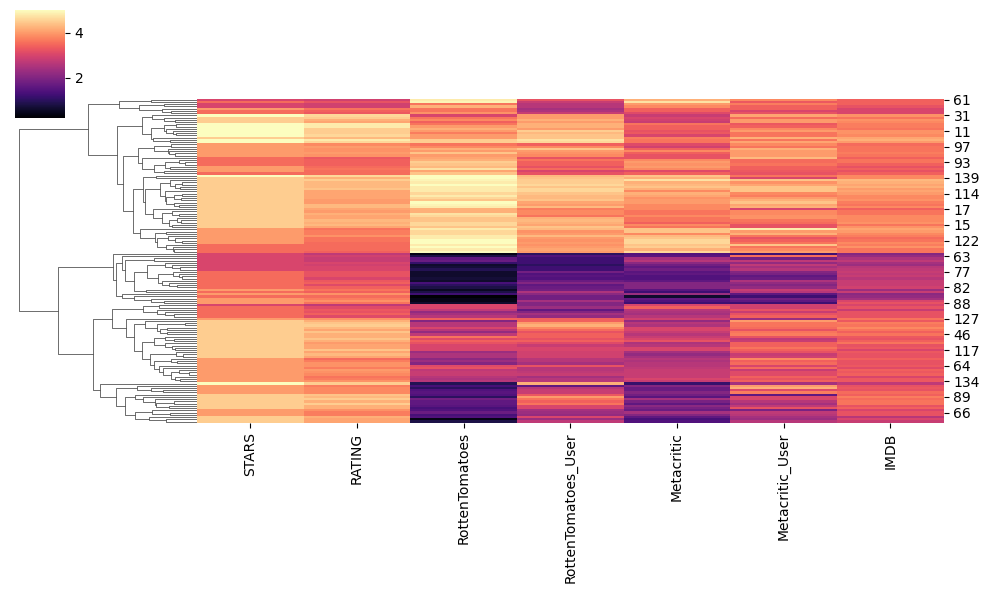

In [52]:
sns.clustermap(data=norm_data.drop(columns=['FILM']),figsize=(10,6),col_cluster=False,cmap='magma')

***Top 10 lowest ratted movies by Rotten Tomatoes***

In [53]:
norm_data.sort_values(by='RottenTomatoes')[:10]

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


***distribution of ratings across all sites for the top 10 worst movies***

In [54]:
worst_10 = norm_data.sort_values(by='RottenTomatoes')[:10]

<Axes: ylabel='Density'>

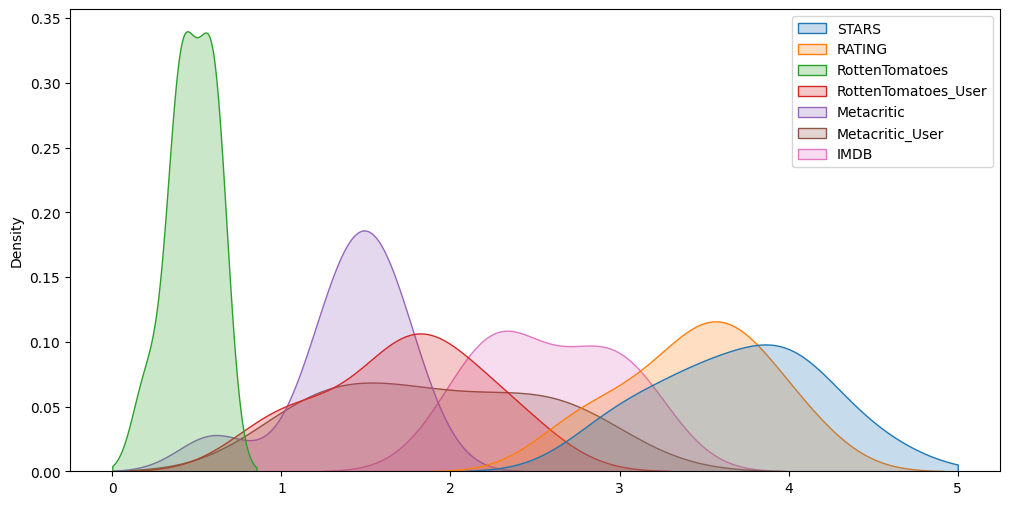

In [55]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=worst_10,fill=True,clip=(0,5))

----